# Deep Learning
## HW1 - Problem 1 - Recommender System (100 + 20 pts)

### Please fill this part


1.   Full Name: Motahare Hazrati
2.   Student Number: 400206613


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.ticker as ticker
from math import sqrt


from sklearn.metrics import mean_squared_error

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.3)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

In [2]:
# Change the address as you wish
plays = pd.read_csv('./data/user_artists.dat', sep='\t')
artists = pd.read_csv('./data/artists.dat', sep='\t', usecols=['id','name'])

# Preprocessing (20 pts)

In [3]:
###############################################################################
## TODO: merge two DataSets in a way that below DataFrame is created         ##
###############################################################################

artists= artists.rename(columns={'id': 'artistID'})
artists['id']= artists['artistID']
ap = pd.merge(plays, artists, on="artistID")
ap = ap.sort_values(by=['artistID', 'userID' ])
ap = ap.reset_index()
ap = ap[['id','name','userID','artistID','weight']]
ap

id                 name  userID  artistID  weight
0         1         MALICE MIZER      34         1     212
1         1         MALICE MIZER     274         1     483
2         1         MALICE MIZER     785         1      76
3         2      Diary of Dreams     135         2    1021
4         2      Diary of Dreams     257         2     152
...     ...                  ...     ...       ...     ...
82741  9921               Nebula     772      9921      10
82742  9921               Nebula    2090      9921     603
82743  9922  The Atomic Bitchwax     772      9922      10
82744  9923           Astroqueen     772      9923      10
82745  9924            Blind Dog     772      9924       9

[82746 rows x 5 columns]

In [4]:
ap

id                 name  userID  artistID  weight
0         1         MALICE MIZER      34         1     212
1         1         MALICE MIZER     274         1     483
2         1         MALICE MIZER     785         1      76
3         2      Diary of Dreams     135         2    1021
4         2      Diary of Dreams     257         2     152
...     ...                  ...     ...       ...     ...
82741  9921               Nebula     772      9921      10
82742  9921               Nebula    2090      9921     603
82743  9922  The Atomic Bitchwax     772      9922      10
82744  9923           Astroqueen     772      9923      10
82745  9924            Blind Dog     772      9924       9

[82746 rows x 5 columns]

In [5]:
###############################################################################
## TODO: rename the weight columns to PlayCount         ##
###############################################################################
ap = ap.rename(columns={"weight": "playCount"})
ap

In [6]:
###############################################################################
## TODO: Delete the "id" columns and reset_indexes of ap                     ##
###############################################################################
ap=ap.drop(['id'],axis=1)
ap

name  userID  artistID  playCount
0             MALICE MIZER      34         1        212
1             MALICE MIZER     274         1        483
2             MALICE MIZER     785         1         76
3          Diary of Dreams     135         2       1021
4          Diary of Dreams     257         2        152
...                    ...     ...       ...        ...
82741               Nebula     772      9921         10
82742               Nebula    2090      9921        603
82743  The Atomic Bitchwax     772      9922         10
82744           Astroqueen     772      9923         10
82745            Blind Dog     772      9924          9

[82746 rows x 4 columns]

In [9]:
a=ap.groupby('name', as_index=False)['playCount'].sum()
a = a.rename(columns={"playCount": "totalArtistPlays"})
a.reset_index()
b=ap.groupby('name', as_index=False)['playCount'].mean()
b = b.rename(columns={"playCount": "avgUserPlays"})
c= (pd.DataFrame(ap['name'].value_counts())).reset_index()
c.columns=['name', 'totalUniqueUsers']
g = pd.merge(a, b, on="name")
artist_rank= pd.merge(g, c, on="name")
artist_rank

name  totalArtistPlays  avgUserPlays  totalUniqueUsers
0                 !deladap                65     65.000000                 1
1                    #####              3707    463.375000                 8
2     (We Are) Performance                 1      1.000000                 1
3                   *NSYNC             12715    438.448276                29
4                      +44              6127    340.388889                18
...                    ...               ...           ...               ...
9677                   이효리              1517    505.666667                 3
9678                    태양              1230    410.000000                 3
9679                   티아라              7238    723.800000                10
9680                    현아              1106    553.000000                 2
9681             ＭＡＮＮＥＱＵＩＮ               566    566.000000                 1

[9682 rows x 4 columns]

In [8]:
artist_rank = artist_rank.sort_values(by=['totalArtistPlays'],ascending=False,)
artist_rank

name  totalArtistPlays  avgUserPlays  totalUniqueUsers
1325      Britney Spears           2393140   4584.559387               522
2244        Depeche Mode           1301308   4614.567376               282
4629           Lady Gaga           1291387   2113.563011               611
1701  Christina Aguilera           1058405   2600.503686               407
6104            Paramore            963449   2414.659148               399
...                  ...               ...           ...               ...
9638                笹川美和                 1      1.000000                 1
5664        Naomi Yohani                 1      1.000000                 1
4764           Liberty X                 1      1.000000                 1
124       A.M. Architect                 1      1.000000                 1
8628          Tutu Jones                 1      1.000000                 1

[9682 rows x 4 columns]

In [ ]:
artist_rank

name  totalArtistPlays  avgUserPlays  totalUniqueUsers
1325      Britney Spears           2393140   4584.559387               522
2244        Depeche Mode           1301308   4614.567376               282
4629           Lady Gaga           1291387   2113.563011               611
1701  Christina Aguilera           1058405   2600.503686               407
6104            Paramore            963449   2414.659148               399
...                  ...               ...           ...               ...
9638                笹川美和                 1      1.000000                 1
5664        Naomi Yohani                 1      1.000000                 1
4764           Liberty X                 1      1.000000                 1
124       A.M. Architect                 1      1.000000                 1
8628          Tutu Jones                 1      1.000000                 1

[9682 rows x 4 columns]

In [10]:
###############################################################################
## TODO: Create  a Dataframe like below where for each name in ap dataframe,
# corresponding row in artist rank is attached to it  
###############################################################################

ap = pd.merge(ap, artist_rank, on="name")
ap = ap.sort_values(by=['playCount'],ascending=False,)
ap.head(20)

name  userID  artistID  playCount  totalArtistPlays  \
2800         Depeche Mode    1642        72     352698           1301308   
35843              Thalía    2071       792     324663            350035   
27302                  U2    1094       511     320725            493024   
8152                 Blur    1905       203     257978            318221   
26670            Paramore    1664       498     227829            963449   
21191         Evanescence    1146       378     203165            513476   
14165  Christina Aguilera     514       292     176133           1058405   
33309             Shakira    1983       701     172496            688529   
33127             Shakira     757       701     169596            688529   
31835           Glee Cast    1086       679     165902            506453   
26983           In Flames     903       503     146411            237148   
32498        All Time Low     946       687     144559            215777   
13324      Britney Spears     542       289     131733           2393140   
21165         Evanescence     938       378     129595            513476   
13680      Britney Spears    2031       289     128654           2393140   
25865  30 Seconds to Mars    1368       486     125471            485532   
5575           Pink Floyd     292       163     123065            466104   
3640            Lady Gaga    1135        89     114672           1291387   
6792                 a-ha     442       187     112009            205195   
7737     System of a Down     459       198     110185            277397   

       avgUserPlays  totalUniqueUsers  
2800    4614.567376               282  
35843  13462.884615                26  
27302   2664.994595               185  
8152    2791.412281               114  
26670   2414.659148               399  
21191   2272.017699               226  
14165   2600.503686               407  
33309   2158.398119               319  
33127   2158.398119               319  
31835   2033.947791               249  
26983   3539.522388                67  
32498   2802.298701                77  
13324   4584.559387               522  
21165   2272.017699               226  
13680   4584.559387               522  
25865   2247.833333               216  
5575    1806.604651               258  
3640    2113.563011               611  
6792    2115.412371                97  
7737    1532.580110               181

In [ ]:
ap.head(20)

name  userID  artistID  playCount  totalArtistPlays  \
2800         Depeche Mode    1642        72     352698           1301308   
35843              Thalía    2071       792     324663            350035   
27302                  U2    1094       511     320725            493024   
8152                 Blur    1905       203     257978            318221   
26670            Paramore    1664       498     227829            963449   
21191         Evanescence    1146       378     203165            513476   
14165  Christina Aguilera     514       292     176133           1058405   
33309             Shakira    1983       701     172496            688529   
33127             Shakira     757       701     169596            688529   
31835           Glee Cast    1086       679     165902            506453   
26983           In Flames     903       503     146411            237148   
32498        All Time Low     946       687     144559            215777   
13324      Britney Spears     542       289     131733           2393140   
21165         Evanescence     938       378     129595            513476   
13680      Britney Spears    2031       289     128654           2393140   
25865  30 Seconds to Mars    1368       486     125471            485532   
5575           Pink Floyd     292       163     123065            466104   
3640            Lady Gaga    1135        89     114672           1291387   
6792                 a-ha     442       187     112009            205195   
7737     System of a Down     459       198     110185            277397   

       avgUserPlays  totalUniqueUsers  
2800    4614.567376               282  
35843  13462.884615                26  
27302   2664.994595               185  
8152    2791.412281               114  
26670   2414.659148               399  
21191   2272.017699               226  
14165   2600.503686               407  
33309   2158.398119               319  
33127   2158.398119               319  
31835   2033.947791               249  
26983   3539.522388                67  
32498   2802.298701                77  
13324   4584.559387               522  
21165   2272.017699               226  
13680   4584.559387               522  
25865   2247.833333               216  
5575    1806.604651               258  
3640    2113.563011               611  
6792    2115.412371                97  
7737    1532.580110               181

# Exploration

In [11]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots();
    fig.set_size_inches(16, 5);
    ax = sns.barplot(x[:20], y[:20], palette='Blues_r');
    ax.set_xlabel(x_label);
    ax.set_ylabel(y_label);
    ax.set_title(title);
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))));

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='black', fontsize=12);

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption,horizontalalignment='right');

    plt.xticks(rotation=90);
    plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


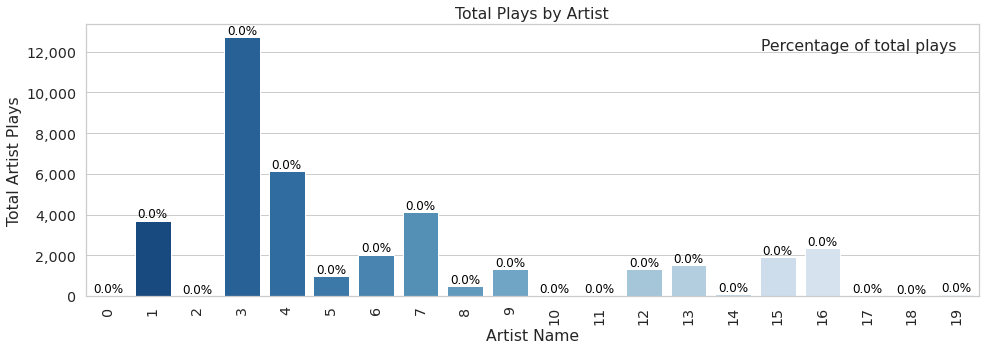

In [12]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentage of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val);

In [13]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentage of total unique users'
total_val = ap.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


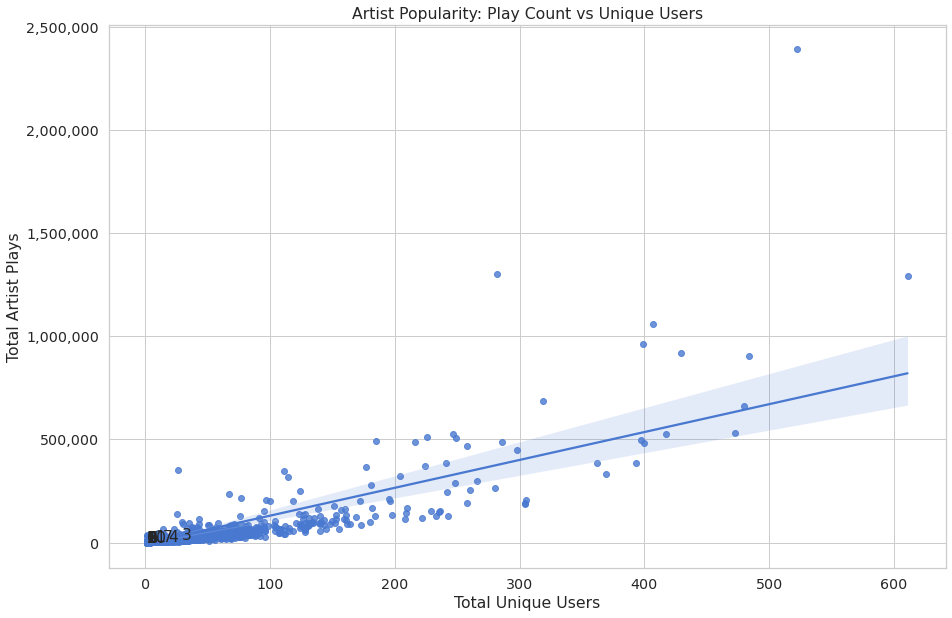

In [14]:
top_artists = (artist_rank.iloc[0:11,:]).index # TODO : index of top 12 items in "artist_rank" based on their "totalArtistPlays"

x = artist_rank.totalUniqueUsers # TODO : "totalUniqueUsers" of "artist_rank"
y = artist_rank.totalArtistPlays # TODO :  "totalArtistPlays" of "artist_rank"
labels = artist_rank.index # TODO : index of "artist_rank"

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users')
ax.set_ylabel('Total Artist Plays')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

# Preprocessing (30 pts)

In [15]:
pc = ap.playCount 
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [16]:
###############################################################################
## TODO: Create  a Dataframe with userID as its rows, artistID as its columns and
## "play_count_scaled" as the value of each cell, in this manner you're creating
## a table which demonstrates what rating each user has for a set of items(artists)
## Your created table should be like below example
###############################################################################
ratings_df = ap.pivot(index='userID',columns='artistID',values='playCountScaled')
ratings_df

artistID  1     2         3     4     5         6     7     8     9     10    \
userID                                                                         
2          NaN   NaN       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   
3          NaN   NaN       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   
4          NaN   NaN       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   
5          NaN   NaN       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   
6          NaN   NaN       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   
...        ...   ...       ...   ...   ...       ...   ...   ...   ...   ...   
2095       NaN   NaN       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   
2096       NaN   NaN       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   
2097       NaN   NaN       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   
2099       NaN   NaN       NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   
2100       NaN   NaN  0.001154   NaN   NaN  0.001143   NaN   NaN   NaN   NaN   

artistID  ...  9915  9916  9917  9918  9919  9920  9921  9922  9923  9924  
userID    ...                                                              
2         ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3         ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4         ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5         ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
6         ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
2095      ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2096      ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2097      ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2099      ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2100      ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[1886 rows x 9682 columns]

In [ ]:
ratings_df

artistID  1      2         3      4      5         6      7      8      9      \
userID                                                                          
2           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
3           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
4           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
5           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
6           NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
...         ...    ...       ...    ...    ...       ...    ...    ...    ...   
2095        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2096        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2097        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2099        NaN    NaN       NaN    NaN    NaN       NaN    NaN    NaN    NaN   
2100        NaN    NaN  0.001154    NaN    NaN  0.001143    NaN    NaN    NaN   

artistID  10     ...  18736  18737  18738  18739  18740  18741  18742  18743  \
userID           ...                                                           
2           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
6           NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
...         ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
2095        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2096        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2097        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2099        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2100        NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

artistID  18744  18745  
userID                  
2           NaN    NaN  
3           NaN    NaN  
4           NaN    NaN  
5           NaN    NaN  
6           NaN    NaN  
...         ...    ...  
2095        NaN    NaN  
2096        NaN    NaN  
2097        NaN    NaN  
2099        NaN    NaN  
2100        NaN    NaN  

[1892 rows x 17632 columns]

In [17]:
###############################################################################
# TODO: Fill each NaN value with 0 and return a numpy array corresponding modified DataFrame
###############################################################################
ratings = (ratings_df.fillna(0)).to_numpy() # Your Code
ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

In [18]:
###############################################################################
# TODO : Calculate how sparse your data is (in percent) and print it, meaning 
# what fraction of the above table is filled with observed values.
###############################################################################

## Your Code
c=np.count_nonzero(ratings)/ratings.size * 100
print('sparse fraction=' + str(round(c,3))+' %')
## END

sparse fraction=0.45 %


# Fitting(Training) Model (50pts)

In [19]:
MIN_USER_RATINGS = 35
DELETE_RATING_COUNT = 15

###############################################################################
# TODO : Complete the below function in way that, getting ratings array, creates
# two same size arrays as train and validation, and for the users in ratings array
# that have at least "MIN_USER_RATINGS" observed ratings, choose "DELETE_RATING_COUNT"
# of these ratings, make them zero in train table and put them in validation table
# return train and validation tables
###############################################################################


def train_test_split(ratings):
    train=ratings.copy()
    validation=np.zeros_like(ratings)
    for i in range(len(ratings)):
      ch=np.count_nonzero(ratings[i,:])
      if ch>35:
        indx=np.where(ratings[i,:])[0]
        np.random.shuffle(indx)
        val=indx[-15:]
        validation[i,val]=train[i,val]
        train[i,val]=0
    return train, validation

In [20]:
train, val = train_test_split(ratings)
val

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00115397, ..., 0.        , 0.        ,
        0.        ]])

In [25]:
###############################################################################
# TODO : Complete below function in a way to return sqrt value of "mean_squared_error"
# between non-zero(observed) values of ground_truth and prediction. Note that you sould
# care about observed values of ground_truth table not prediction!
###############################################################################


def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

In [26]:
class Recommender:
  
  def __init__(self, n_epochs=200, n_latent_features=3, lmbda=0.1, learning_rate=0.001):
    self.n_epochs = n_epochs
    self.n_latent_features = n_latent_features
    self.lmbda = lmbda
    self.learning_rate = learning_rate
  
  def predictions(self, P, Q):
    predict=np.dot(P.T, Q)
    return predict
  
  def fit(self, X_train, X_val):
    m, n = X_train.shape

    self.P = np.random.rand(self.n_latent_features, m)
    self.Q = np.random.rand(self.n_latent_features, n)
    
    self.train_loss = []
    self.val_loss = []

    users, items = X_train.nonzero()
    
    for epoch in range(self.n_epochs):
        for u, i in zip(users, items):
            loss = X_train[u, i] - self.predictions(self.P[:,u], self.Q[:,i])
            self.P[:, u] += 0.01*self.learning_rate * (loss * self.Q[:, i] - self.lmbda * self.P[:, u])
            self.Q[:, i] += 0.01*self.learning_rate * (loss * self.P[:, u] - self.lmbda * self.Q[:, i])

        train_rmse = rmse(self.predictions(self.P, self.Q), X_train)
        val_rmse = rmse(self.predictions(self.P, self.Q), X_val)
        self.train_loss.append(train_rmse)
        self.val_loss.append(val_rmse)
    return self

  def predict(self, X_train, user_index):
    y_new = self.predictions(self.P, self.Q)
    predictions_index = np.where(X_train[user_index, :] == 0)[0]
    return y_new[user_index, predictions_index].flatten()

In [27]:
#creating recommender object
recommender = Recommender().fit(train, val)

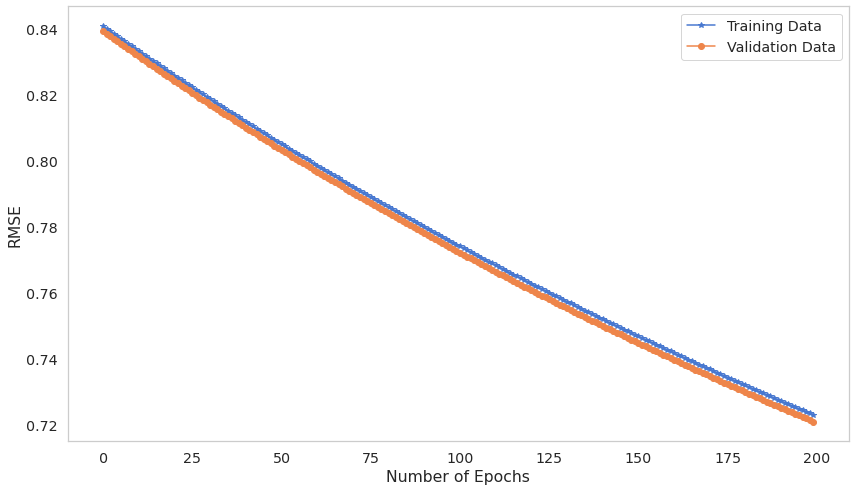

In [30]:
###############################################################################
# TODO : Plot the loss of train and loss
###############################################################################

plt.plot(range(recommender.n_epochs), recommender.train_loss, marker='*', label='Training Data');
plt.plot(range(recommender.n_epochs), recommender.val_loss, marker='o', label='Validation Data');
plt.xlabel('Number of Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

# Bonus
**Can you improve the accuracy of model? If so, Do it and explain why it imporved! (Note that improvement must be noticable) (+10 pts)**

# Making recommendations

In [ ]:
user_id = 1236
user_index = ratings_df.index.get_loc(user_id)
predictions_index = np.where(train[user_index, :] == 0)[0]

rating_predictions = recommender.predict(train, user_index)

In [ ]:
def create_artist_ratings(artists_df, artists_index, ratings, n=10):
  artist_ids = ratings_df.columns[artists_index]
  artist_ratings = pd.DataFrame(data=dict(artistId=artist_ids, rating=ratings))
  top_n_artists = artist_ratings.sort_values("rating", ascending=False).head(n)
  
  artist_recommendations = artists_df[artists_df.id.isin(top_n_artists.artistId)].reset_index(drop=True)
  artist_recommendations['rating'] = pd.Series(top_n_artists.rating.values)
  return artist_recommendations.sort_values("rating", ascending=False)

In [ ]:
existing_ratings_index = np.where(train[user_index, :] > 0)[0]
existing_ratings = train[user_index, existing_ratings_index]

create_artist_ratings(artists, existing_ratings_index, existing_ratings)

In [ ]:
# Your Systems Recommendation for specific user_id on its unobserved ratings:
create_artist_ratings(artists, predictions_index, rating_predictions)

# Bonus
**Whatever innovation you can the on representing results of your system visually (+5 pts, note that top visualizations in sense of innovation will get the point)**